In [5]:
from bank import Bank
from players import SesquaGreedyPlayer, GreedyPlayer, RollThresholdPlayer
import matplotlib.pyplot as plt
import numpy as np

In [6]:
thresholds = [i for i in range(1, 51)]

sesqua_win_pct = []
sesqua_tie_pct = []
greedy_win_pct = []
greedy_tie_pct = []

thresh_win_pct_sesqua = []
thresh_win_pct_greedy = []


for threshold in thresholds:
    players = [SesquaGreedyPlayer(), RollThresholdPlayer(threshold=threshold)]
    win_pct, tie_pct = Bank.estimate_win_probability(players, rounds=10, num_simulations=1000)
    sesqua_win_pct.append(win_pct[0])
    sesqua_tie_pct.append(tie_pct[0])
    thresh_win_pct_sesqua.append(win_pct[1])


    players = [GreedyPlayer(), RollThresholdPlayer(threshold=threshold)]
    win_pct, tie_pct = Bank.estimate_win_probability(players, rounds=10, num_simulations=1000)
    greedy_win_pct.append(win_pct[0])
    greedy_tie_pct.append(tie_pct[0])
    thresh_win_pct_greedy.append(win_pct[1])

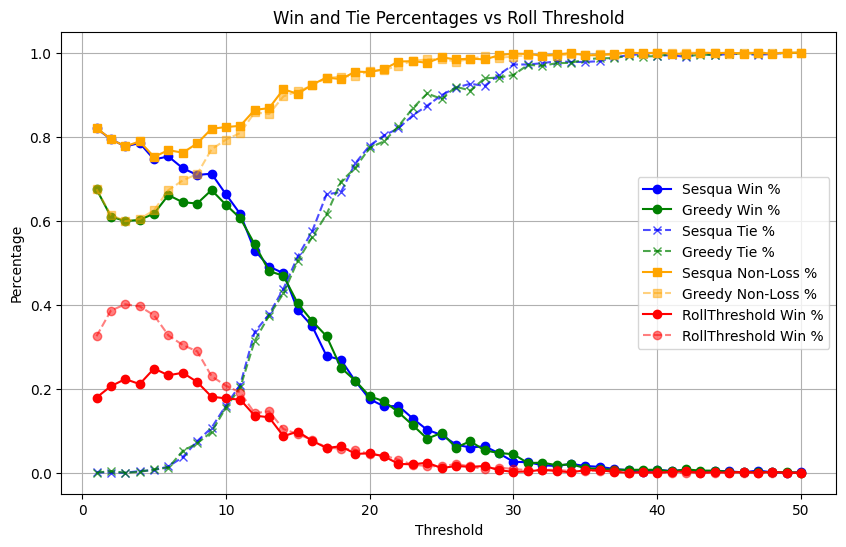

In [7]:

plt.figure(figsize=(10, 6))
plt.plot(thresholds, sesqua_win_pct, label="Sesqua Win %", marker='o', color='blue')
plt.plot(thresholds, greedy_win_pct, label="Greedy Win %", marker='o', color='green')
plt.plot(thresholds, sesqua_tie_pct, label="Sesqua Tie %", marker='x', linestyle='--', color='blue', alpha=0.7)
plt.plot(thresholds, greedy_tie_pct, label="Greedy Tie %", marker='x', linestyle='--', color='green', alpha=0.7)
# Non-loss rate is (win % + tie %) for each strategy.
sesqua_non_loss = [w + t for w, t in zip(sesqua_win_pct, sesqua_tie_pct)]
greedy_non_loss = [w + t for w, t in zip(greedy_win_pct, greedy_tie_pct)]
plt.plot(thresholds, sesqua_non_loss, label="Sesqua Non-Loss %", color='orange', linestyle='-', marker='s')
plt.plot(thresholds, greedy_non_loss, label="Greedy Non-Loss %", color='orange', linestyle='--', marker='s', alpha=0.5)
# threshold win %
plt.plot(thresholds, thresh_win_pct_sesqua, label="RollThreshold Win %", color='red', linestyle='-', marker='o')
plt.plot(thresholds, thresh_win_pct_greedy, label="RollThreshold Win %", color='red', linestyle='--', marker='o', alpha=0.5)
plt.xlabel("Threshold")
plt.ylabel("Percentage")
plt.title("Win and Tie Percentages vs Roll Threshold")
plt.legend()
plt.grid(True)
plt.savefig("sesqa_greedy_test_roll.png")
plt.show()
